<a href="https://colab.research.google.com/github/inarentifi/inared/blob/main/in_gr_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
#!python -m spacy download el_core_news_sm

In [41]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [42]:
import pandas as pd
%matplotlib inline
import numpy as np
import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime

In [43]:
filepath = "https://raw.githubusercontent.com/datajour-gr/DataJournalism/main/Bachelor%20Lessons%202023/Lesson%2010/NRC_GREEK_Translated_6_2020.csv"

In [44]:
emolex_df = pd.read_csv(filepath)
emolex_df.head()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,αφεση,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ενορκη βεβαιωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,εχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,εχω,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,οριο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True, drop=True)

In [46]:
emolex_df.tail()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13156,ουρλιασμα,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
13157,κροκος αυγου,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13158,νεοτερος,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13159,ζεφυρος,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13160,ζουμ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
import spacy

In [48]:
nlp = spacy.load('el_core_news_sm')

In [49]:
may_df = pd.read_csv("/content/gdrive/MyDrive/in.gr-MAY23.csv")

In [50]:
len(may_df)

8370

In [51]:
may_df.head(1)

,site,url,date,section,title,author,text
0,in.gr,https://www.in.gr/2023/05/01/world/oukrania-sy...,2023-05-01,Κόσμος,Ουκρανία: Συνάντηση με ΝΑΤΟ για τις ανάγκες τη...,Σύνταξη ΙΝ,Εν μέσω προετοιμασιών για την πολυσυζητημένη ο...


In [52]:
short_may_df = may_df[['date','text' ]]

In [53]:
short_may_df.tail()

,date,text
8365,2023-05-31,Πληθαίνουν τα περιστατικά με την εμφάνιση οχιώ...
8366,2023-05-31,Αυτή την ώρα πραγματοποιείται η ενημέρωση των ...
8367,2023-05-31,Συγκλονίζει η σύζυγος του 47χρονου εργάτη που ...
8368,2023-05-31,Η Ellie Goldstein μίλησε στο «Πάμε Δανάη» για ...
8369,2023-05-30,Η Μικρή Άρκτος καλωσορίζει στην εκδοτική της ο...


In [54]:
short_may_df.dtypes

date    object
text    object
dtype: object

In [55]:
short_may_df['date'] = pd.to_datetime(short_may_df['date'], format='%Y-%m-%d')

<ipython-input-55-bd910d6566d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_may_df['date'] = pd.to_datetime(short_may_df['date'], format='%Y-%m-%d')


In [56]:
short_may_df.dtypes

date    datetime64[ns]
text            object
dtype: object

In [57]:
short_may_df.head()

,date,text
0,2023-05-01,Εν μέσω προετοιμασιών για την πολυσυζητημένη ο...
1,2023-05-01,Με άστατο καιρό θα πραγματοποιηθεί η επιστροφή...
2,2023-05-01,"Είναι εμβληματικό, σημείο αναφοράς, το μέρος π..."
3,2023-05-01,"Ο οικονομολόγος Σαντιάγο Πένια, ο υποψήφιος το..."
4,2023-05-01,Ο «φερόμενος ως ηγέτης» της τζιχαντιστικής οργ...


In [61]:
short_may_df['text'] = short_may_df['text'].str.replace(r'https?:\/\/.*[\r\n]*'," ", regex=True)

<ipython-input-61-af8fa76327d2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_may_df['text'] = short_may_df['text'].str.replace(r'https?:\/\/.*[\r\n]*'," ", regex=True)


In [58]:
emolex_df['word'].head(3)

0              αφεση
1    ενορκη βεβαιωση
2            εχοντας
Name: word, dtype: object

In [63]:
short_may_df['text'] = short_may_df['text'].fillna('')

<ipython-input-63-c8a1916491ae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_may_df['text'] = short_may_df['text'].fillna('')


In [64]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word,
                      lowercase=False,
                      strip_accents = 'unicode',
                      stop_words= list(nlp.Defaults.stop_words),
                      ngram_range=(1, 2))

In [65]:
matrix = vec.fit_transform(short_may_df['text'])
vocab = vec.get_feature_names_out()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

,αφεση,ενορκη βεβαιωση,εχοντας,εχω,οριο,ορμος,υδρα,αγια τραπεζα,αμην,απατσι,...,κλητηριο ενταλμα,κατειργασμενος,μαγια,κιτρινο,κιτρινιζω,ουρλιασμα,κροκος αυγου,νεοτερος,ζεφυρος,ζουμ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
wordcount_df.shape

(8370, 13161)

In [67]:
emolex_df.head()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,αφεση,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ενορκη βεβαιωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,εχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,εχω,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,οριο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
emolex_df[emolex_df.Anger == 1].tail()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13094,διεξοδος,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13096,ζωυφια,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
13100,θυματοποιω,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
13128,αποτυχημενος,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
13156,ουρλιασμα,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [69]:
# Φτιάξε μια λίστα με positive words
positive_words = emolex_df[emolex_df.Positive == 1]['word']

# Φτιάξε μια λίστα με negative words
negative_words = emolex_df[emolex_df.Negative == 1]['word']

# Φτιάξε μια λίστα με anger words
angry_words = emolex_df[emolex_df.Anger == 1]['word']

# Φτιάξε μια λίστα με anticipation words
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']

# Φτιάξε μια λίστα με disgust words
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']

# Φτιάξε μια λίστα με fear words
fear_words = emolex_df[emolex_df.Fear == 1]['word']

# Φτιάξε μια λίστα με joy words
joy_words = emolex_df[emolex_df.Joy == 1]['word']

# Φτιάξε μια λίστα με sadness words
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']

# Φτιάξε μια λίστα με surprise words
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']

# Φτιάξε μια λίστα με trust words
trust_words = emolex_df[emolex_df.Trust == 1]['word']

In [70]:
trust_words

8                        αμην
15             γαμηλιο ταξιδι
24       διευθυντρια σχολειου
38                 επικοινωνω
45                   εκκλησια
                 ...         
13039                  αληθης
13075             αναμφιβολως
13079             ανυπερβατος
13113            αναθηματικος
13114       αποδειξη πληρωμης
Name: word, Length: 1259, dtype: object

In [71]:
wordcount_df.tail(1)

,αφεση,ενορκη βεβαιωση,εχοντας,εχω,οριο,ορμος,υδρα,αγια τραπεζα,αμην,απατσι,...,κλητηριο ενταλμα,κατειργασμενος,μαγια,κιτρινο,κιτρινιζω,ουρλιασμα,κροκος αυγου,νεοτερος,ζεφυρος,ζουμ
8369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
wordcount_df[trust_words].sum(axis=1) # ποσα trustwords υπαρχουν σε καθε κειμενο

0        6
1        2
2       11
3       24
4       11
        ..
8365     9
8366     0
8367     6
8368     8
8369    17
Length: 8370, dtype: int64

In [74]:
short_may_df['anger'] = wordcount_df[angry_words].sum(axis=1)

short_may_df['positive'] = wordcount_df[positive_words].sum(axis=1)

short_may_df['joy'] = wordcount_df[joy_words].sum(axis=1)

short_may_df['disgust'] = wordcount_df[disgust_words].sum(axis=1)

short_may_df['surprise'] = wordcount_df[surprise_words].sum(axis=1)

short_may_df['trust'] = wordcount_df[trust_words].sum(axis=1)

short_may_df['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)

short_may_df['sadness'] = wordcount_df[sadness_words].sum(axis=1)

short_may_df['negative'] = wordcount_df[negative_words].sum(axis=1)

short_may_df['fear'] = wordcount_df[fear_words].sum(axis=1)

<ipython-input-74-f7f4f6fbf744>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_may_df['anger'] = wordcount_df[angry_words].sum(axis=1)
<ipython-input-74-f7f4f6fbf744>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_may_df['positive'] = wordcount_df[positive_words].sum(axis=1)
<ipython-input-74-f7f4f6fbf744>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

In [75]:
short_may_df

,date,text,anger,positive,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
0,2023-05-01,Εν μέσω προετοιμασιών για την πολυσυζητημένη ο...,8,11,2,7,2,6,5,7,10,9
1,2023-05-01,Με άστατο καιρό θα πραγματοποιηθεί η επιστροφή...,1,3,2,2,0,2,2,2,3,0
2,2023-05-01,"Είναι εμβληματικό, σημείο αναφοράς, το μέρος π...",0,13,5,3,3,11,8,4,5,6
3,2023-05-01,"Ο οικονομολόγος Σαντιάγο Πένια, ο υποψήφιος το...",17,37,9,17,3,24,21,9,25,16
4,2023-05-01,Ο «φερόμενος ως ηγέτης» της τζιχαντιστικής οργ...,6,11,5,3,4,11,11,3,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...
8365,2023-05-31,Πληθαίνουν τα περιστατικά με την εμφάνιση οχιώ...,8,6,2,8,4,9,6,4,17,11
8366,2023-05-31,Αυτή την ώρα πραγματοποιείται η ενημέρωση των ...,1,1,0,0,0,0,0,0,1,1
8367,2023-05-31,Συγκλονίζει η σύζυγος του 47χρονου εργάτη που ...,7,11,9,2,8,6,7,7,13,9
8368,2023-05-31,Η Ellie Goldstein μίλησε στο «Πάμε Δανάη» για ...,4,11,12,2,2,8,6,0,7,4


In [76]:
short_may_df.reset_index(inplace=True)
short_may_df.set_index('date', inplace=True)
short_may_df

,index,text,anger,positive,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
date,,,,,,,,,,,,
2023-05-01,0,Εν μέσω προετοιμασιών για την πολυσυζητημένη ο...,8,11,2,7,2,6,5,7,10,9
2023-05-01,1,Με άστατο καιρό θα πραγματοποιηθεί η επιστροφή...,1,3,2,2,0,2,2,2,3,0
2023-05-01,2,"Είναι εμβληματικό, σημείο αναφοράς, το μέρος π...",0,13,5,3,3,11,8,4,5,6
2023-05-01,3,"Ο οικονομολόγος Σαντιάγο Πένια, ο υποψήφιος το...",17,37,9,17,3,24,21,9,25,16
2023-05-01,4,Ο «φερόμενος ως ηγέτης» της τζιχαντιστικής οργ...,6,11,5,3,4,11,11,3,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-31,8365,Πληθαίνουν τα περιστατικά με την εμφάνιση οχιώ...,8,6,2,8,4,9,6,4,17,11
2023-05-31,8366,Αυτή την ώρα πραγματοποιείται η ενημέρωση των ...,1,1,0,0,0,0,0,0,1,1
2023-05-31,8367,Συγκλονίζει η σύζυγος του 47χρονου εργάτη που ...,7,11,9,2,8,6,7,7,13,9


<Axes: xlabel='date'>

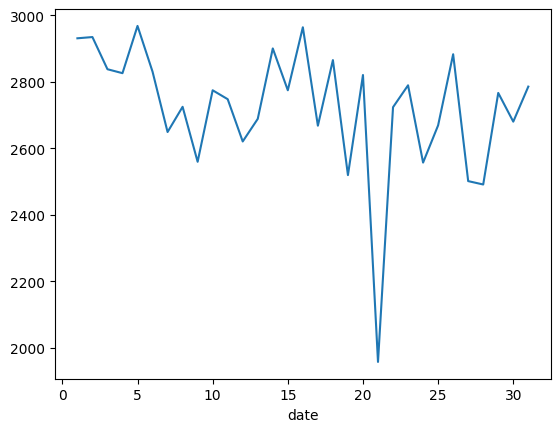

In [77]:
short_may_df['text'].str.len().groupby(by=short_may_df.index.day).mean().plot()

<Axes: xlabel='date'>

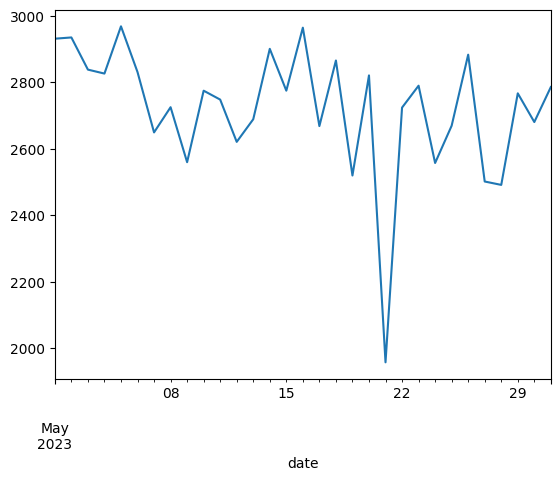

In [78]:
short_may_df['text'].str.len().resample('D').mean().plot()

<Axes: ylabel='date'>

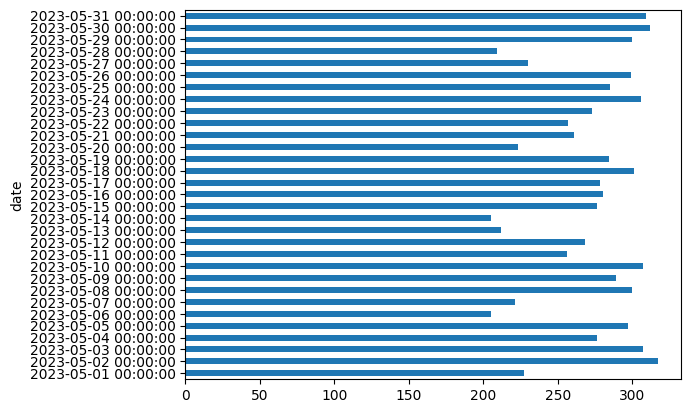

In [79]:
short_may_df['text'].resample('D').count().plot(kind='barh')

<Axes: xlabel='date'>

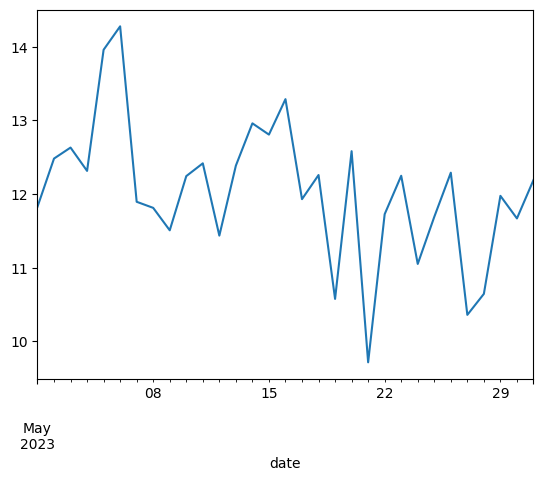

In [80]:
short_may_df['positive'].resample('D').mean().plot()

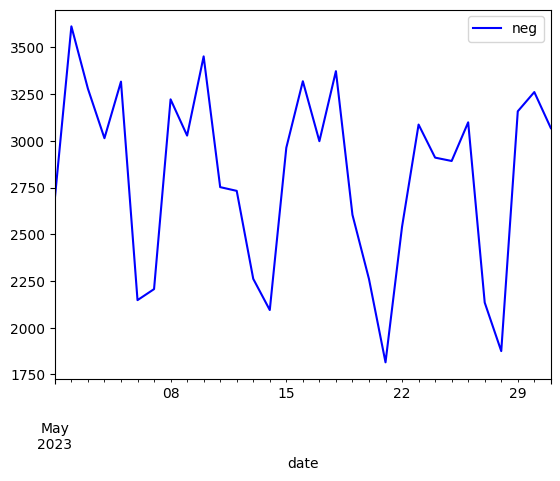

In [81]:
short_may_df['negative'].resample('D').sum().plot(color = 'b',label = 'neg').legend()

<Axes: xlabel='date'>

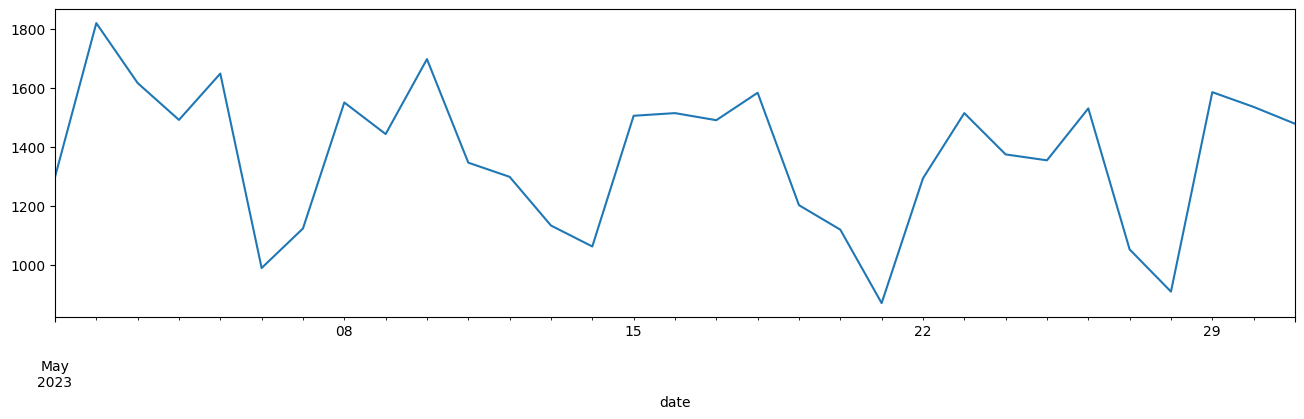

In [82]:
short_may_df['anger'].resample('D').sum().plot(figsize=(16,4))

<Axes: xlabel='date'>

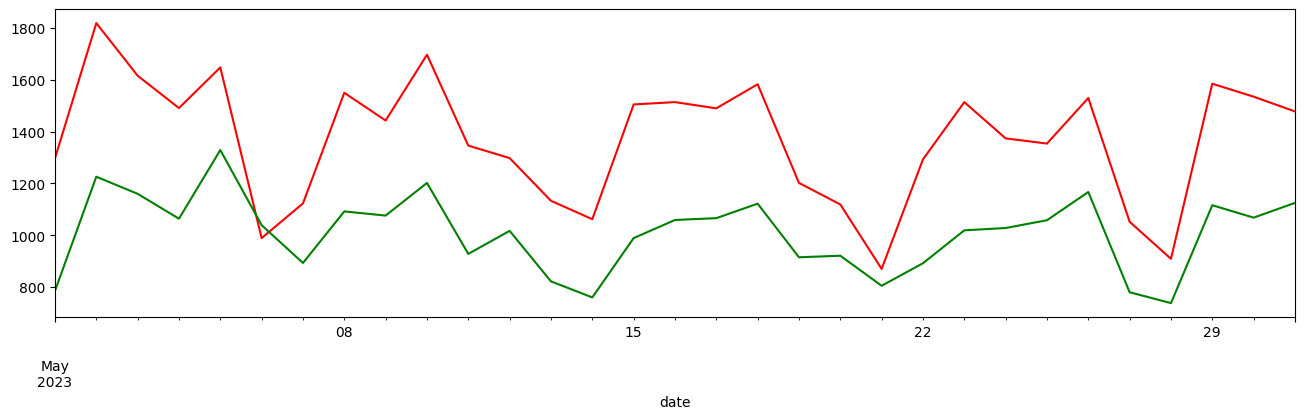

In [83]:
ax = short_may_df['anger'].resample('D').sum().plot(figsize=(16,4), color = 'red')
short_may_df['joy'].resample('D').sum().plot(figsize=(16,4), ax = ax, color = 'green')

<Axes: xlabel='date'>

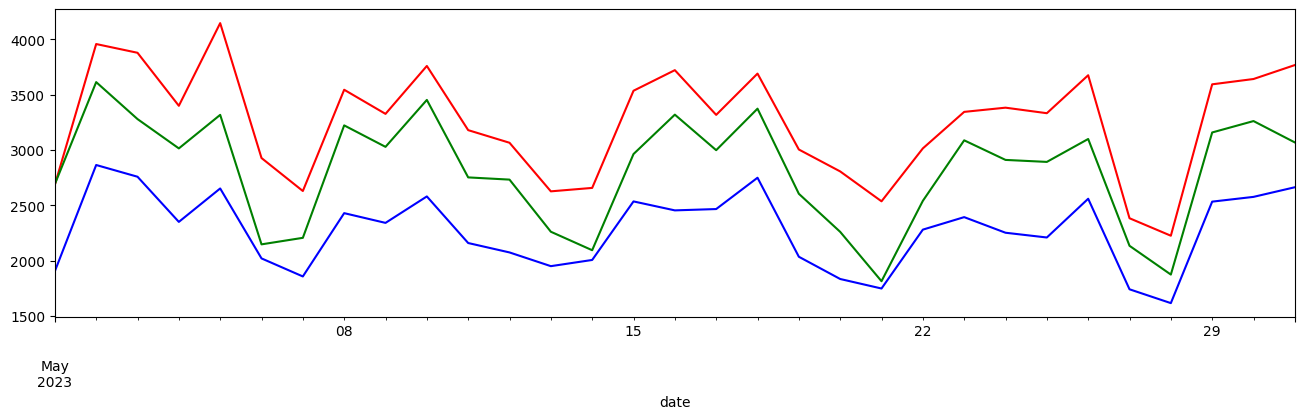

In [84]:
ax = short_may_df['positive'].resample('D').sum().plot(figsize=(16,4), color = 'red')
short_may_df['negative'].resample('D').sum().plot(figsize=(16,4), ax = ax, color = 'green')
short_may_df['trust'].resample('D').sum().plot(figsize=(16,4), ax = ax, color = 'blue')

In [85]:
import matplotlib.pyplot as plt
plt.style.use('default')

In [86]:
#plt.style.use('classic')
#plt.style.use('ggplot')
plt.style.use('Solarize_Light2')
#plt.style.use('seaborn-v0_8-bright')

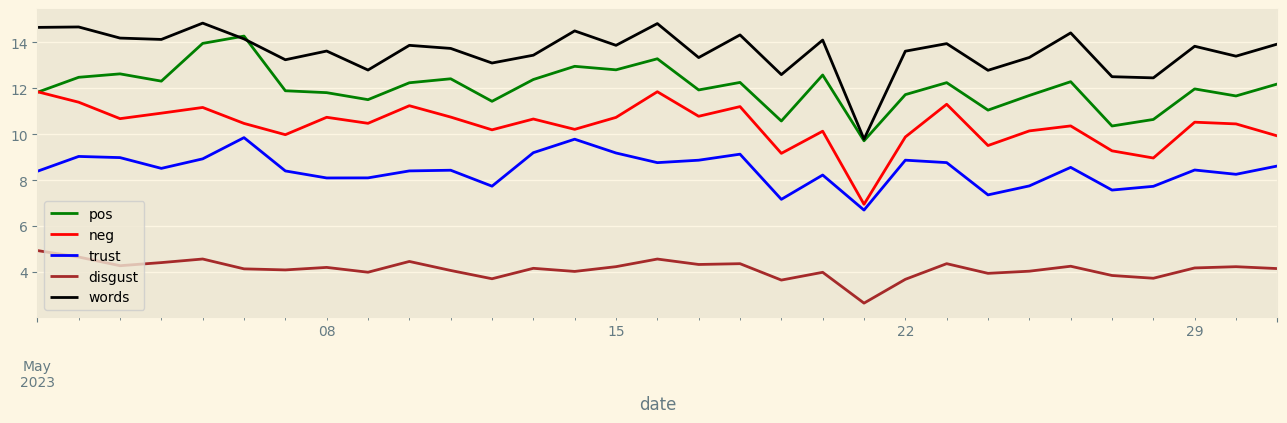

In [88]:
ax = short_may_df['positive'].resample('D').mean().plot(figsize=(16,4),
                                                          color = 'g', label='pos')
short_may_df['negative'].resample('D').mean().plot(figsize=(16,4), ax = ax,
                                                   label = 'neg', color = 'r')
short_may_df['trust'].resample('D').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'trust',color = 'blue').legend()
short_may_df['disgust'].resample('D').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'disgust',color = 'brown').legend()
(short_may_df['text'].str.len().resample('D').mean()/200).plot(figsize=(16,4), ax = ax, # διαιρώ το mean των λέξεων με το 200 για να πλησιάσει στην κλίμακα τα άλλα
                                                label = 'words',color = 'black').legend()

<Axes: xlabel='date'>

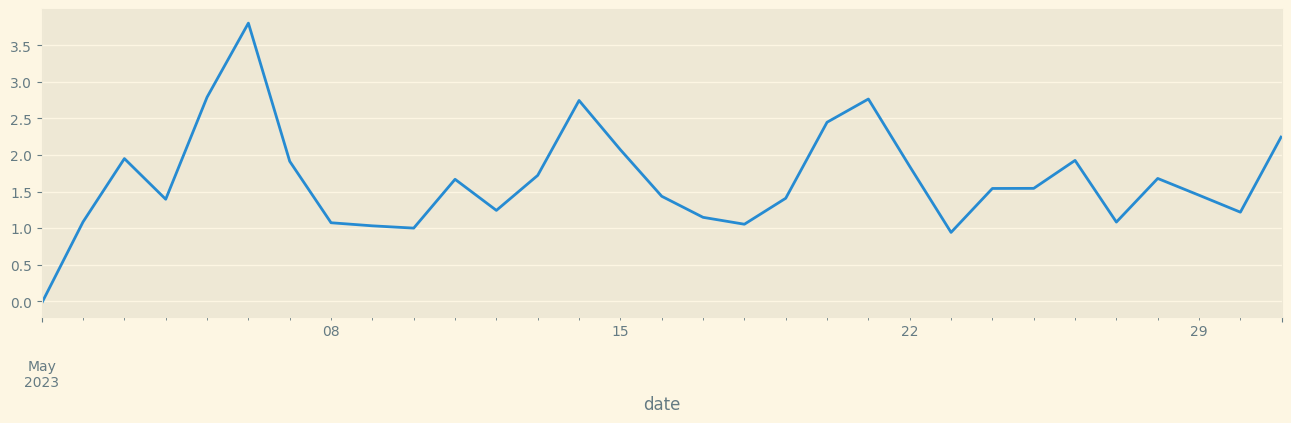

In [90]:
short_may_df['pos/neg'] = short_may_df['positive'] - short_may_df['negative']
short_may_df['pos/neg'].resample('D').mean().plot(figsize=(16,4))

In [91]:
#plt.style.use('grayscale')
plt.style.use('seaborn-v0_8-darkgrid')

<Axes: xlabel='date'>

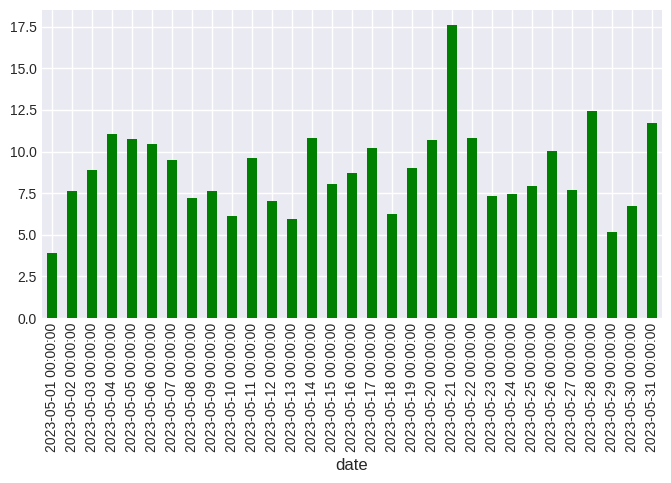

In [93]:
short_may_df['(-)αρνητικότητα | θετικότητα(+)'] = short_may_df.positive*100//short_may_df[['positive','negative']].sum(
        axis=1) - short_may_df.negative*100//short_may_df[['positive','negative']].sum(axis=1)

short_may_df['(-)αρνητικότητα | θετικότητα(+)'].resample('D').mean().plot(kind='bar',
                                                                               color=(short_may_df['(-)αρνητικότητα | θετικότητα(+)'].resample('D').mean()>0
                                                                               ).map({True: 'g', False: 'r'}), figsize=(8,4))

In [95]:
short_may_df[(short_may_df['(-)αρνητικότητα | θετικότητα(+)'] == short_may_df['(-)αρνητικότητα | θετικότητα(+)'].max()) |
                  (short_may_df['(-)αρνητικότητα | θετικότητα(+)'] == short_may_df['(-)αρνητικότητα | θετικότητα(+)'].min())
                  ][['index', 'positive', 'negative', '(-)αρνητικότητα | θετικότητα(+)']]

,index,positive,negative,(-)αρνητικότητα | θετικότητα(+)
date,,,,
2023-05-01,24,0,9,-100.0
2023-05-01,60,2,0,100.0
2023-05-01,79,4,0,100.0
2023-05-02,80,1,0,100.0
2023-05-01,87,2,0,100.0
...,...,...,...,...
2023-05-31,8246,0,5,-100.0
2023-05-31,8249,0,2,-100.0
2023-05-31,8260,1,0,100.0


In [96]:
may_df.loc[[20,104,118], ['url','title', 'text']]

,url,title,text
20,https://www.in.gr/2023/05/01/politics/politcs-...,«Ο Κάρολος δεν πρόκειται να συγχωρήσει εύκολα ...,"Οχι, η λατρεία (η οποία, σε ορισμένες περιπτώσ..."
104,https://www.in.gr/2023/05/01/go-fun/tv/maestro...,«Maestro»: Τι συμβαίνει αυτές τις μέρες στα γυ...,Ο Θοδωρής Κουτσογιαννόπουλος βρέθηκε στους Παξ...
118,https://www.in.gr/2023/05/01/sports/basketball...,Ο Μπαρτζώκας και το καπέλο του στην Πόλη,Τα δύο πρώτα ματς στο ΣΕΦ; Μια μονομαχία του υ...
